## Logistic Regression with cost and gradient descent FROM SCRATCH
### Includes plotting

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/Gurubux/SelfStudyNotes/master/Linear_Regression/ex2data1.txt",header=None)

In [31]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [32]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [0]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)

In [34]:
X[:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [35]:
y[:5]

array([0, 0, 0, 1, 1])

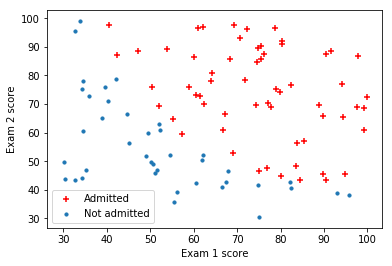

In [36]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

In [37]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))
# testing the sigmoid function
sigmoid(0)

0.5

In [0]:
def costFunction(theta, X, y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

# def cost(theta, X, y):
#     theta = np.matrix(theta)
#     X = np.matrix(X)
#     y = np.matrix(y)
#     first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
#     second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
#     return np.sum(first - second) / (len(X))

In [0]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [40]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X[:5],X_mean,X_std

(array([[-1.60224763,  0.63834112],
        [-1.82625564, -1.2075414 ],
        [-1.53903969,  0.3612943 ],
        [-0.28210129,  1.0863683 ],
        [ 0.69152826,  0.49337794]]),
 array([65.64427406, 66.22199809]),
 array([19.36068671, 18.48963567]))

In [41]:
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
X[:5],y[:5]

(array([[ 1.        , -1.60224763,  0.63834112],
        [ 1.        , -1.82625564, -1.2075414 ],
        [ 1.        , -1.53903969,  0.3612943 ],
        [ 1.        , -0.28210129,  1.0863683 ],
        [ 1.        ,  0.69152826,  0.49337794]]), array([[0],
        [0],
        [0],
        [1],
        [1]]))

In [42]:
initial_theta = np.zeros((n+1,1))
initial_theta

array([[0.],
       [0.],
       [0.]])

In [43]:
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [0]:
def predict(theta, X):
    probability = sigmoid(X * theta)
    return [1 if x >= 0.5 else 0 for x in probability]


def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    print(theta)
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
        if (i == 1 or i == num_iters-1 or ((i%2) == 0  and i<=50)):
          print(i)
          plt.plot(J_history)
          plt.xlabel("Iteration")
          plt.ylabel("$J(\Theta)$")
          plt.title("Cost function using Gradient Descent")
#           predictions = predict(np.matrix(theta),X)
#           w = np.squeeze(np.asarray((X @ theta).reshape(1,-1)))
#           t = np.squeeze(np.asarray(sigmoid(X @ theta).reshape(1,-1)))
#           print(X[:5],theta[:5],w[:5],t[:5])
#           new_df = pd.DataFrame({"w":w,"t":t,"predictions":predictions})
#           fig, ax = plt.subplots(figsize=(12,8))
#           sns.scatterplot(x='w', y='t',hue='predictions', data=new_df); 
#           ax.plot([np.min(w), np.max(w)], [0.5, 0.5], linewidth=2)
        plt.show()  
    return theta , J_history

[[0.]
 [0.]
 [0.]]
0


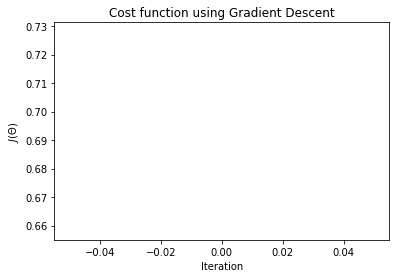

1


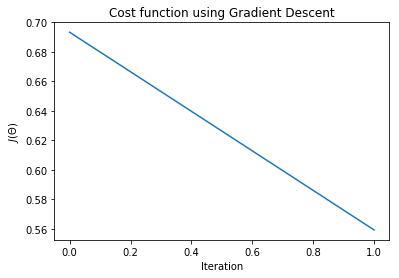

2


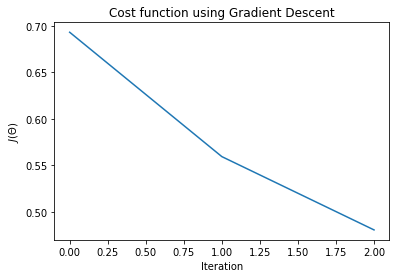

4


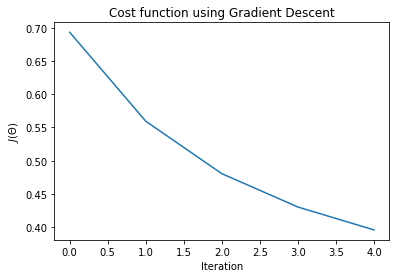

6


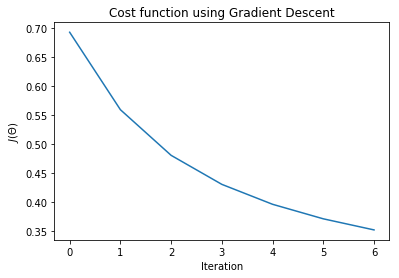

8


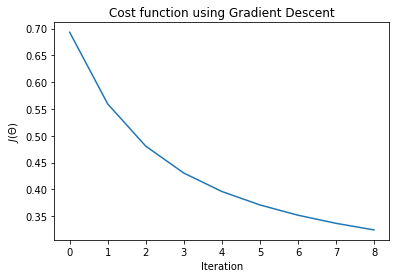

10


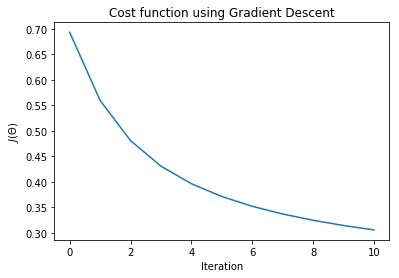

12


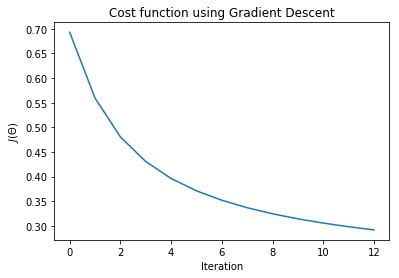

14


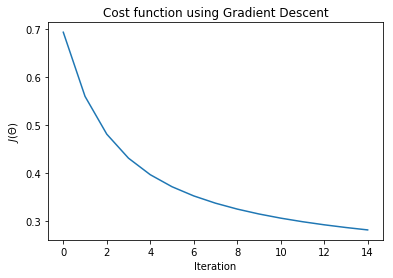

16


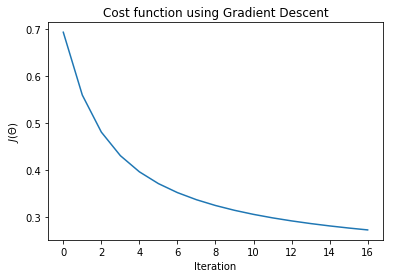

18


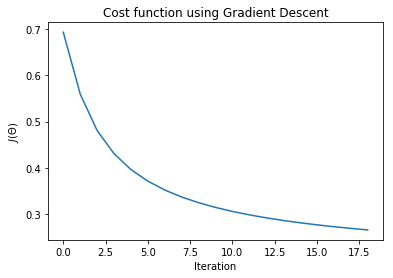

20


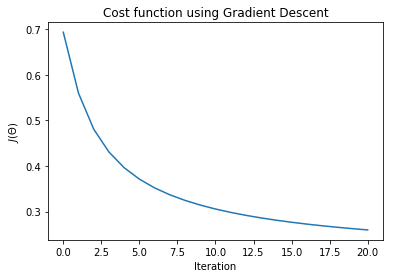

22


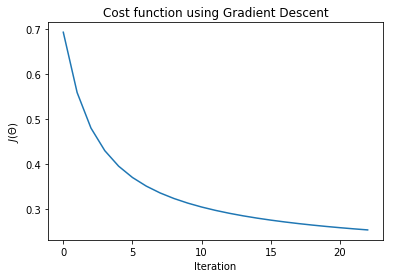

24


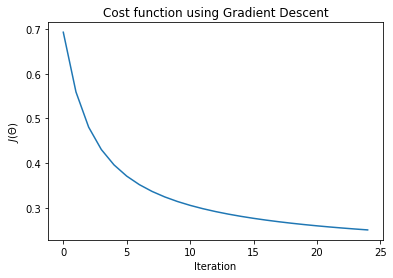

26


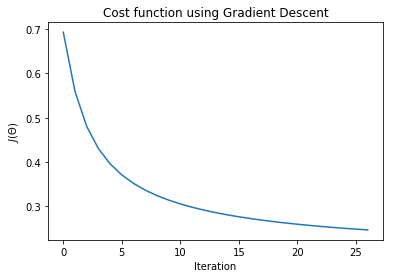

28


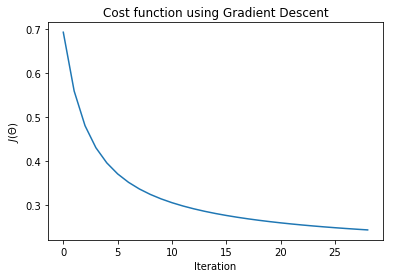

30


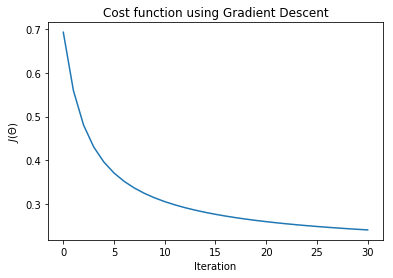

32


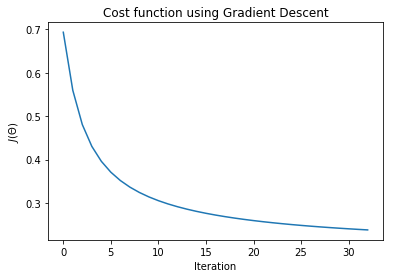

34


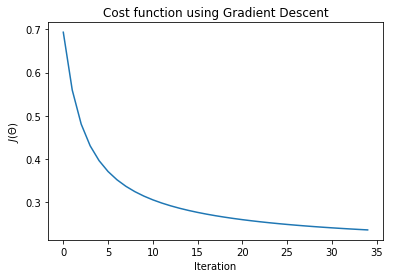

36


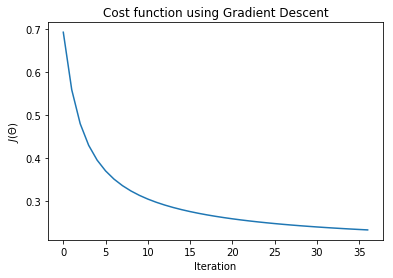

38


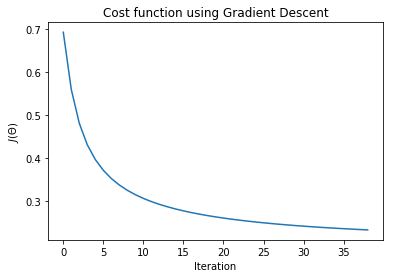

40


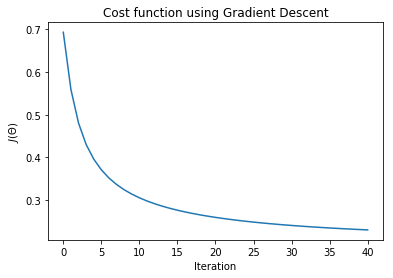

42


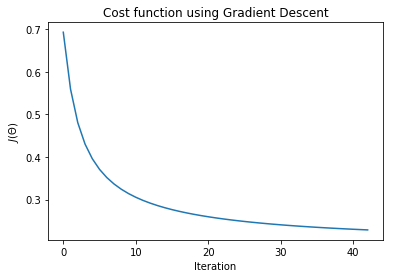

44


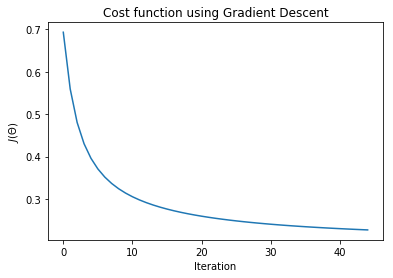

46


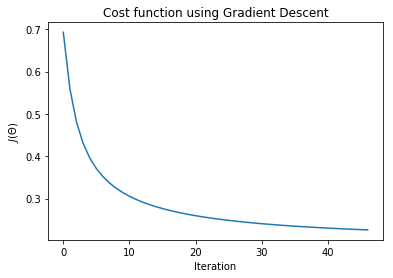

48


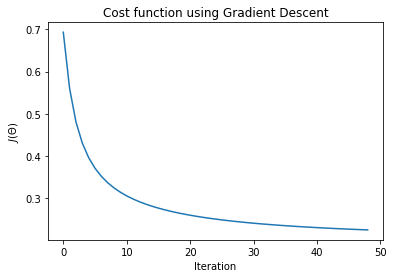

50


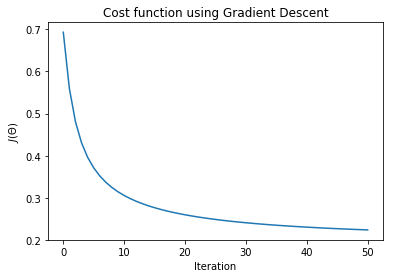

999


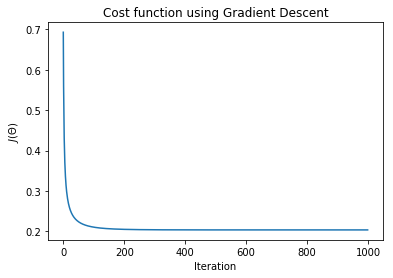

Theta optimized by gradient descent: [[1.71671348]
 [3.98908079]
 [3.72154954]]
The cost of the optimized theta: 0.20349778840675822


In [87]:
theta , J_history = gradientDescent(X,y,initial_theta,1,1000)
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

In [46]:
print(J_history)

[0.693147180559946, 0.559403242545655, 0.4805876648533871, 0.43046342235936136, 0.39605647005498307, 0.3709669278894235, 0.35181143821554683, 0.3366625823479169, 0.3243484792498155, 0.31411698799771753, 0.3054632898746155, 0.2980357306412133, 0.29158158307561594, 0.2859143408821499, 0.2808932044202074, 0.2764097679797487, 0.2723791206465763, 0.2687337409240406, 0.2654192108626502, 0.2623911455046634, 0.2596129525785907, 0.2570541709629098, 0.2546892200293839, 0.25249644553195266, 0.2504573827607223, 0.24855618107480806, 0.24677914982076546, 0.2451143966177867, 0.24355153668345655, 0.24208145734126266, 0.24069612578706717, 0.23938843105923613, 0.2381520532694504, 0.23698135472344695, 0.2358712887425202, 0.23481732289271778, 0.23381537401406843, 0.2328617529706419, 0.23195311745280278, 0.23108643148423902, 0.23025893053940155, 0.2294680913776006, 0.2287116058600059, 0.2279873581441674, 0.22729340475420326, 0.22662795710875627, 0.22598936615723075, 0.2253761088308248, 0.22478677606094832,

Text(0.5, 1.0, 'Cost function using Gradient Descent')

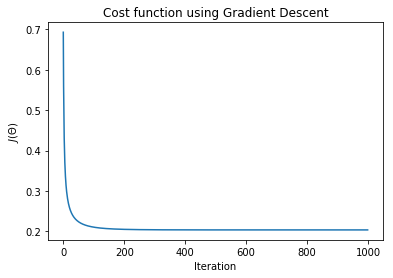

In [47]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [48]:
pos[:5,0],np.min(X[:,1]),np.max(X[:,1])

(array([False, False, False,  True,  True]),
 -1.8380263127595429,
 1.765618350591358)

In [49]:
x_value_2 = np.array([np.min(X[:,2]),np.max(X[:,2])])
y_value_2=-(theta[0] +theta[2]*x_value_2)/theta[1]
x_value_2,y_value_2

(array([-1.92641626,  1.76571557]), array([ 1.3668663 , -2.07764944]))

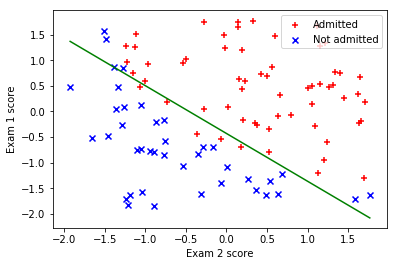

In [50]:
plt.scatter(X[pos[:,0],2],X[pos[:,0],1],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],2],X[neg[:,0],1],c="b",marker="x",label="Not admitted")
plt.plot(x_value_2,y_value_2, "g")
plt.xlabel("Exam 2 score")
plt.ylabel("Exam 1 score")
plt.legend(loc=0)

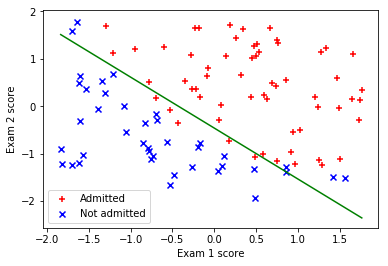

In [51]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
x_value,y_value
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [52]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %


In [53]:
x_test = np.array([45,85])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.7760428925608951


In [54]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %


In [58]:
p.tolist()[:5],type(p.tolist())

([[False], [False], [False], [True], [True]], list)

In [63]:
np.matrix(theta)[:5],type(np.matrix(theta))

(matrix([[1.71671348],
         [3.98908079],
         [3.72154954]]), numpy.matrix)

In [61]:
X[:5],type(X)

(array([[ 1.        , -1.60224763,  0.63834112],
        [ 1.        , -1.82625564, -1.2075414 ],
        [ 1.        , -1.53903969,  0.3612943 ],
        [ 1.        , -0.28210129,  1.0863683 ],
        [ 1.        ,  0.69152826,  0.49337794]]), numpy.ndarray)

In [0]:
def predict(theta, X):
    probability = sigmoid(X * theta)
    return [1 if x >= 0.5 else 0 for x in probability]
predictions = predict(np.matrix(theta),X)

In [73]:
(X @ theta)[:5],type((X * theta.T))

(array([[ -2.29916366],
        [-10.06229295],
        [ -3.07806555],
        [  4.63436209],
        [  6.31140602]]), numpy.ndarray)

In [75]:
w = np.squeeze(np.asarray((X @ theta).reshape(1,-1)))
w[:5],type(w)

(array([ -2.29916366, -10.06229295,  -3.07806555,   4.63436209,
          6.31140602]), numpy.ndarray)

In [77]:
t = np.squeeze(np.asarray(sigmoid(X @ theta).reshape(1,-1)))
t[:5],type(t)

(array([9.11922501e-02, 4.26562991e-05, 4.40211518e-02, 9.90381121e-01,
        9.98187811e-01]), numpy.ndarray)

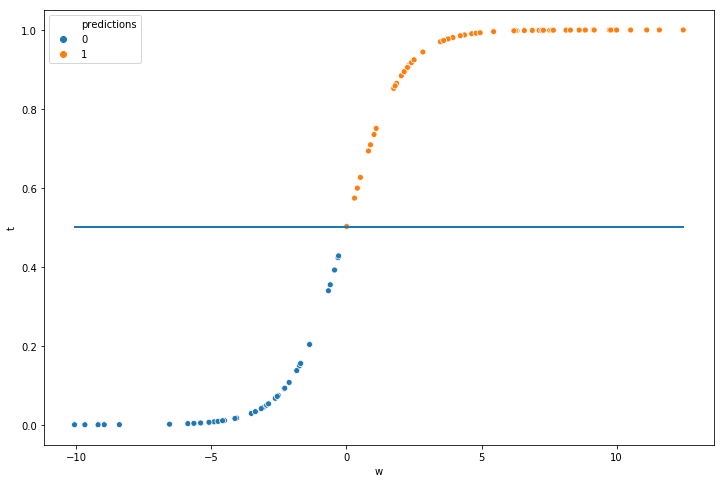

In [80]:
import seaborn as sns
w = np.squeeze(np.asarray((X @ theta).reshape(1,-1)))
t = np.squeeze(np.asarray(sigmoid(X @ theta).reshape(1,-1)))
new_df = pd.DataFrame({"w":w,"t":t,"predictions":predictions})
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x='w', y='t',
              hue='predictions', data=new_df); 
ax.plot([np.min(w), np.max(w)], [0.5, 0.5], linewidth=2)